<ipython-input-11-ee6599c71693>:48: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  ax1.plot(arc_Grid_Spacing2, pre_est[0],'r--',linewidth=0.2, linestyle = "dashed",label="Regression")
<ipython-input-11-ee6599c71693>:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([plabel1,plabel2,' {: 5.1f} '.format(pend)])


(array([15.53667389, 23.39905158, 28.73500157, 32.35634405, 34.81403599,
       36.4819947 , 37.61398614, 38.38223334, 38.90361871, 39.25746666,
       39.49761221, 39.66059148, 39.77120042, 39.84626725, 39.89721276,
       39.93178789, 39.95525295, 39.97117795, 39.98198575, 39.98932066,
       39.99429864, 39.99767704, 39.99996985, 40.00152592, 40.00258197,
       40.00329867, 40.00378508, 40.00411519, 40.00433923, 40.00449127,
       40.00459446, 40.00466449, 40.00471202, 40.00474427, 40.00476616,
       40.00478102, 40.0047911 , 40.00479795, 40.00480259, 40.00480574,
       40.00480788, 40.00480933, 40.00481032, 40.00481099, 40.00481144,
       40.00481175, 40.00481196, 40.0048121 , 40.0048122 , 40.00481226]), array([40.0048124 , 24.46813851, 38.76221299]), array([0.65603528, 2.01729218, 5.96311016]))


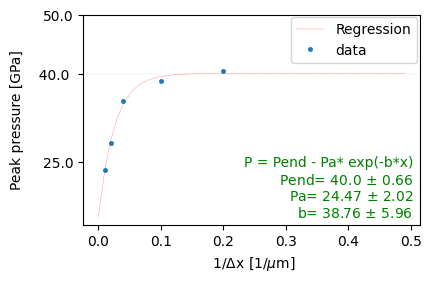

In [11]:
import matplotlib as mpl
#mpl.use('Cairo') #for png, ps, pdf, svg, ...
mpl.use('Agg') #for png
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import math
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.optimize import curve_fit
import cv2
%matplotlib inline




fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(241)
#ax1.set_title('1/Grid_Spacing vs Pressure @7.04 km/s',fontsize=20)

Grid_Spacing = [100,50,25,10,5]
arc_Grid_Spacing = [0,0,0,0,0]
for i in [0,1,2,3,4]:
  arc_Grid_Spacing[i] = 1/Grid_Spacing[i]
arc_Grid_Spacing2 = np.arange(0,0.5,0.01)


pre = [23.60, 28.20, 35.40, 38.80,40.44]

def pre_f(x,p0,pa,pb):
   	return p0 -  pa* np.exp(-pb*x)
p0_init = np.array([50,5,1])



def fit(func, x, param_init):

   	X = arc_Grid_Spacing
   	Y = x
   	popt,pocv=curve_fit(func, X, Y, p0=param_init,maxfev=5000)
   	perr = np.sqrt(np.diag(pocv))
   	y=func(arc_Grid_Spacing2, *popt)
   	return y, popt, perr

pre_est = fit(pre_f,pre,p0_init)
pend = pre_est[1][0]

ax1.plot(arc_Grid_Spacing2, pre_est[0],'r--',linewidth=0.2, linestyle = "dashed",label="Regression")
ax1.plot(arc_Grid_Spacing, pre,'.', markersize=5,label="data" )
ax1.axhline(pend, color = "black", alpha = 0.2, linewidth=0.2, linestyle = "dashed")


plabelscale = len(str(pend).split('.')[0])
plabel1 = 10**(plabelscale)
plabel2 = plabel1/2


if pend <= plabel2:
    	plabel1 = plabel2
    	plabel2 = float(plabel2)/2

ax1.set_yticklabels([plabel1,plabel2,' {: 5.1f} '.format(pend)])
ax1.set_yticks([plabel1,plabel2,pend])
# Set axes limits
#ax1.set_xlim(0,50*ts)
#ax1.set_ylim(0,10)


# Set axes labels
ax1.set_xlabel(' 1/cell size [1/$\mu$m]')
ax1.set_ylabel('Peak pressure [GPa]')

# Axes legends
ax1.legend(loc="upper right", bbox_to_anchor=(0.99,0.99), borderaxespad=0, fontsize=10)
ax1.text(0.98,0.02,"P = Pend - Pa* exp(-b*x)\n Pend= {} $\pm$ {}\nPa= {} $\pm$ {}\nb= {} $\pm$ {}".format(round(pre_est[1][0],2),round(pre_est[2][0],2),round(pre_est[1][1],2),round(pre_est[2][1],2),round(pre_est[1][2],2),round(pre_est[2][2],2)),color="g", fontsize=10, va='bottom', ha='right',transform=ax1.transAxes)


print(pre_est)

<ipython-input-6-4b9d80fabe85>:52: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  ax1.plot(arc_Grid_Spacing2, pre_est[0],'r--',linewidth=0.2, linestyle = "dashed",label="Regression")
<ipython-input-6-4b9d80fabe85>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([plabel1,' {: 5.1f} '.format(pend)])


(array([11.70792031, 16.25835949, 19.43782008, 21.65935722, 23.21157879,
       24.29613944, 25.05393835, 25.5834239 , 25.95338345, 26.21187978,
       26.39249507, 26.5186937 , 26.60687059, 26.66848111, 26.71152932,
       26.74160775, 26.762624  , 26.77730838, 26.78756857, 26.79473752,
       26.79974658, 26.80324648, 26.80569192, 26.80740058, 26.80859445,
       26.80942862, 26.81001147, 26.81041872, 26.81070327, 26.81090208,
       26.811041  , 26.81113807, 26.81120589, 26.81125327, 26.81128638,
       26.81130952, 26.81132568, 26.81133698, 26.81134487, 26.81135038,
       26.81135423, 26.81135693, 26.81135881, 26.81136012, 26.81136104,
       26.81136168, 26.81136213, 26.81136244, 26.81136266, 26.81136281]), array([26.81136317, 15.10344286, 35.8512193 ]), array([0.29553913, 0.82374206, 3.8617179 ]), array([[ 8.73433759e-02,  4.57211555e-03, -6.80915029e-01],
       [ 4.57211555e-03,  6.78550980e-01,  2.18401084e+00],
       [-6.80915029e-01,  2.18401084e+00,  1.49128651e+01]]))


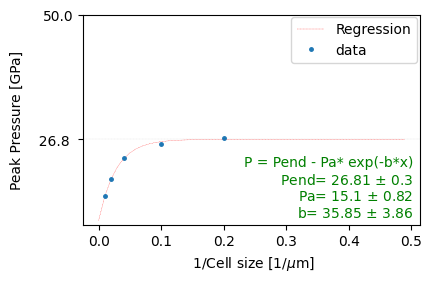

In [6]:
import matplotlib as mpl
#mpl.use('Cairo') #for png, ps, pdf, svg, ...
mpl.use('Agg') #for png
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import math
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.optimize import curve_fit
import cv2
%matplotlib inline




fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(241)
#ax1.set_title('1/Grid_Spacing vs Pressure @5.45 km/s',fontsize=20)

Grid_Spacing = [100,50,25,10,5]
arc_Grid_Spacing = [0,0,0,0,0]
for i in [0,1,2,3,4]:
  arc_Grid_Spacing[i] = 1/Grid_Spacing[i]
arc_Grid_Spacing2 = np.arange(0,0.5,0.01)


pre = [16.20,
19.50,
23.30,
26.00,
27.10]

def pre_f(x,p0,pa,pb):
   	return p0 -  pa* np.exp(-pb*x)
p0_init = np.array([30,5,1])



def fit(func, x, param_init):

   	X = arc_Grid_Spacing
   	Y = x
   	popt,pocv=curve_fit(func, X, Y, p0=param_init,maxfev=5000)
   	perr = np.sqrt(np.diag(pocv))
   	y=func(arc_Grid_Spacing2, *popt)
   	return y, popt, perr,pocv

pre_est = fit(pre_f,pre,p0_init)
pend = pre_est[1][0]

ax1.plot(arc_Grid_Spacing2, pre_est[0],'r--',linewidth=0.2, linestyle = "dashed",label="Regression")
ax1.plot(arc_Grid_Spacing, pre,'.', markersize=5,label="data" )
ax1.axhline(pend, color = "black", alpha = 0.2, linewidth=0.2, linestyle = "dashed")


plabelscale = len(str(pend).split('.')[0])
plabel1 = 10**(plabelscale)
plabel2 = plabel1/2


if pend <= plabel2:
    	plabel1 = plabel2
    	plabel2 = float(plabel2)/2

ax1.set_yticklabels([plabel1,' {: 5.1f} '.format(pend)])
ax1.set_yticks([plabel1,pend])
# Set axes limits
#ax1.set_xlim(0,50*ts)
#ax1.set_ylim(0,10)


# Set axes labels
ax1.set_xlabel(' 1/Cell size [1/$\mu$m]')
ax1.set_ylabel('Peak Pressure [GPa]')

# Axes legends
ax1.legend(loc="upper right", bbox_to_anchor=(0.99,0.99), borderaxespad=0, fontsize=10)
ax1.text(0.98,0.02,"P = Pend - Pa* exp(-b*x)\n Pend= {} $\pm$ {}\nPa= {} $\pm$ {}\nb= {} $\pm$ {}".format(round(pre_est[1][0],2),round(pre_est[2][0],2),round(pre_est[1][1],2),round(pre_est[2][1],2),round(pre_est[1][2],2),round(pre_est[2][2],2)),color="g", fontsize=10, va='bottom', ha='right',transform=ax1.transAxes)

print(pre_est)